# **Jour 45 : Winequality-red**

Cette base de données contient des informations sur **1596 échantillons de vins rouges portugais (Vinho Verde)**. Elle associe des mesures physico-chimiques (analysées en laboratoire) à des évaluations sensorielles (notes de qualité attribuées par des experts).

L'objectif principal est de prédire la **qualité du vin** (notée de **0** à **10**) en fonction de ses propriétés chimiques.

$\bigoplus$ **Signification des variables**

+  fixed acidity :	Acides fixes (acide tartrique, malique)
+  volatile acidity :	Acide acétique (trop élevé = goût de vinaigre)
+  citric acid :	Acidité citrique (fraîcheur et équilibre)
+  residual sugar :	Sucre restant après fermentation (en g/L)
+  chlorides :	Teneur en sel (goût salé/métallique)
+  free sulfur dioxide :	SO₂ libre (antioxydant et conservateur)
+  total sulfur dioxide :	SO₂ total (libre + lié)	
+  density :	Densité (liée à l'alcool et au sucre)
+  pH : 	Niveau d'acidité (échelle 0-14)	
+  sulphates :	Sulfate de potassium (agent conservateur)
+  alcohol :	Degré d'alcool (% en volume)
+  quality :	Note sensorielle (experts)	0 (très mauvais) → 10 (excellent)

## 0. Chargement des librairies

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

## 1. Chargement de la base de données

In [27]:
data = pd.read_csv("../data/winequality-red.csv")


In [28]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Valeurs manquantes et Statistiques Descriptives

### 2.1. Vérification des valeurs manquantes

In [29]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Aucune valeur manquante dans la base.

### 2.2. Statistiques Descriptives

In [30]:
display(data.describe().style.background_gradient(cmap='Blues'))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


Sur les 1596 échantillons de vin rouges, si les bouteilles devraient avoir la même qualité alors chaque bouteille serait notée **5,63** avec un écart de **±0,80 unité** par rapport à cette dernière. 

## 3. Explorations Visuelles

### 3.1. Distribution des Notes

In [31]:
fig = px.histogram(data, x='quality', 
                   title='Distribution des Notes de Qualité',
                   color_discrete_sequence=['#722F37'],
                   nbins=10)
fig.update_layout(bargap=0.1)
fig.show()

Un grand nombre des bouteilles de vin ont leurs notes comprises entre **5** et **6**.

### 3.2. Matrice de corrélation linéaire de Pearson

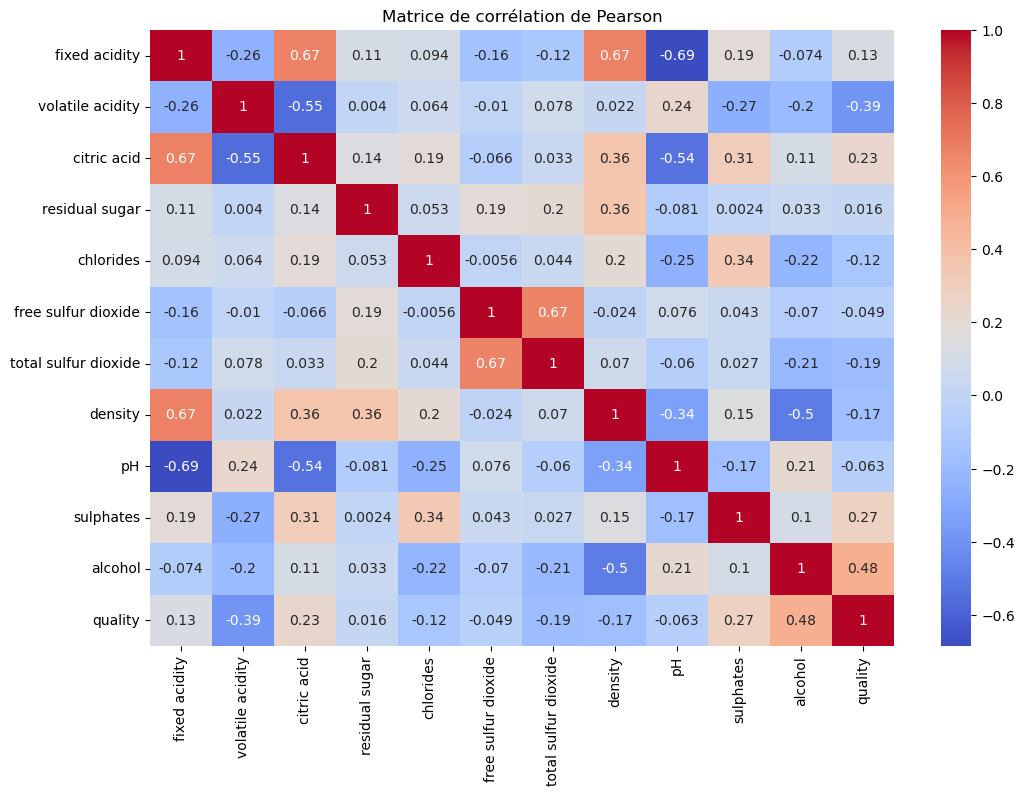

In [32]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Pour l'affichage des valeurs 
    cmap='coolwarm',  # Palette de couleurs
)

plt.title("Matrice de corrélation de Pearson")
plt.show()


## 4. Modélisation

### 4.1. Préparation des données

In [33]:
# Séparation Features/Target
X = data.drop('quality', axis=1)
y = data['quality']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (1276, 11), Test set: (320, 11)


### 4.2. Régression linéaire

In [34]:
# Entraînement du Modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients du Modèle
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)

display(coeff_df.style.bar(color=['red', 'green']))


,Feature,Coefficient
10,alcohol,0.313403
9,sulphates,0.142638
0,fixed acidity,0.062289
3,residual sugar,0.036280
5,free sulfur dioxide,0.028286
2,citric acid,-0.040784
4,chlorides,-0.060994
7,density,-0.064328
8,pH,-0.071660
6,total sulfur dioxide,-0.088204


### 4.3. Evaluation du modèle

In [35]:
# Évaluation du Modèle
y_pred = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

R² Score: 0.338
RMSE: 0.663


## 5. Analyse des Résidus

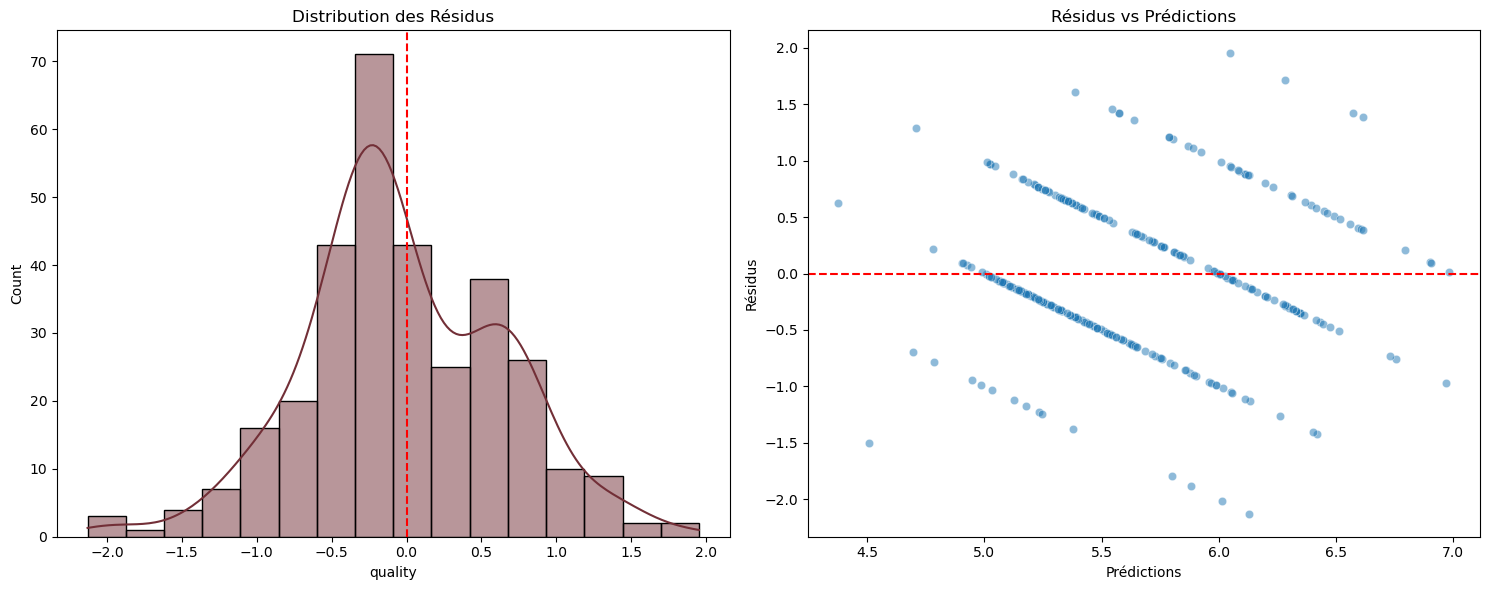

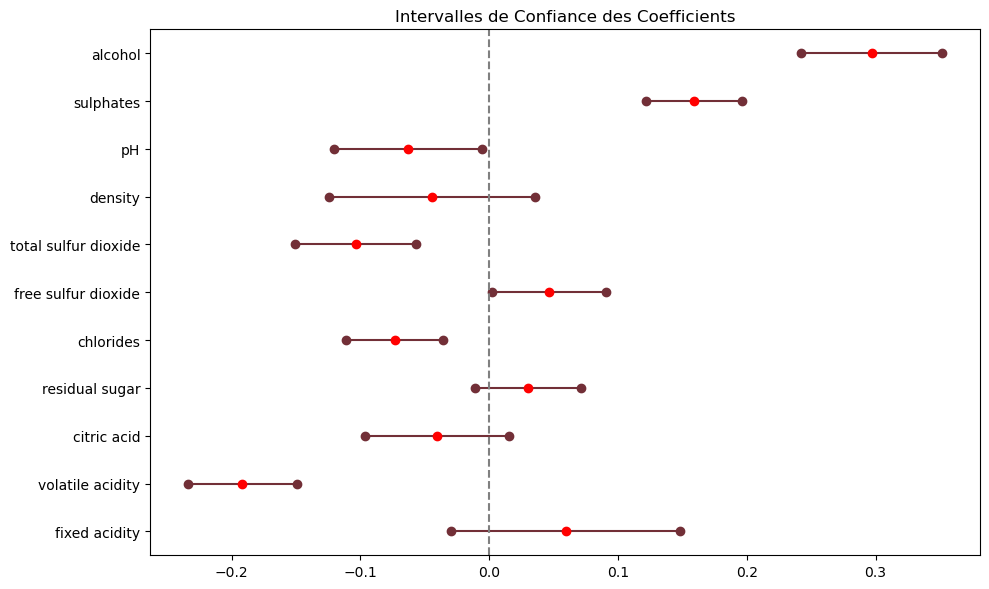

In [36]:
# Analyse des Résidus
residuals = y_test - y_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Distribution des résidus
sns.histplot(residuals, kde=True, ax=ax1, color='#722F37')
ax1.set_title('Distribution des Résidus')
ax1.axvline(0, color='red', linestyle='--')

# Résidus vs Prédictions
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, ax=ax2)
ax2.axhline(0, color='red', linestyle='--')
ax2.set_title('Résidus vs Prédictions')
ax2.set_xlabel('Prédictions')
ax2.set_ylabel('Résidus')

plt.tight_layout()
plt.show()


# Modèle 
X_sm = sm.add_constant(X_scaled)
model_sm = sm.OLS(y, X_sm).fit()


# Intervalle de Confiance des Coefficients
conf_int = model_sm.conf_int()
conf_int.columns = ['Lower', 'Upper']
conf_int['Coefficient'] = model_sm.params
conf_int = conf_int[['Coefficient', 'Lower', 'Upper']]
conf_int.drop('const', inplace=True)

plt.figure(figsize=(10, 6))
for i, var in enumerate(conf_int.index):
    plt.plot([conf_int.loc[var, 'Lower'], conf_int.loc[var, 'Upper']], [i, i], 'o-', color='#722F37')
    plt.plot(conf_int.loc[var, 'Coefficient'], i, 'o', color='red')
plt.yticks(range(len(conf_int)), conf_int.index)
plt.title('Intervalles de Confiance des Coefficients')
plt.axvline(0, color='grey', linestyle='--')
plt.tight_layout()
plt.show()


## 6. Prédiction